Імпортуємо всі необхідні модулі

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf

Імпортуємо датасет

In [2]:
data = pd.read_csv("/Users/yurab/Desktop/Python for university/MMTAD/Lab0/digital_marketing_campaign_dataset.csv")
data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


Обираємо з датасету відповідні колонки

In [3]:
data = data[["CustomerID", "Age", "Income", "AdSpend", "ClickThroughRate", "ConversionRate", "WebsiteVisits", "PagesPerVisit", "TimeOnSite", "SocialShares", "EmailOpens", "EmailClicks", "PreviousPurchases", "LoyaltyPoints", "Conversion"]]
data

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,8000,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,8001,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,8002,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,8003,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,8004,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,24849,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,0
7996,15996,43,44718,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,0
7997,15997,28,125471,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,1
7998,15998,19,107862,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,1


Корелюємо дані та виводимо у вигляді таблиці

In [4]:
data.corr()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
CustomerID,1.000000,-0.003608,0.002310,0.015931,0.005078,0.010161,0.000039,0.000158,-0.013746,-0.011601,-0.003488,-0.003531,-0.012776,-0.023488,-0.180742
Age,-0.003608,1.000000,0.008731,-0.004607,0.011542,0.020027,-0.002078,-0.009280,-0.012998,-0.009531,0.015055,0.008820,-0.007123,0.014049,0.001606
Income,0.002310,0.008731,1.000000,0.003668,0.008080,0.017552,-0.002923,0.003868,0.019404,-0.006297,-0.001506,0.008541,-0.011924,-0.007181,0.013974
AdSpend,0.015931,-0.004607,0.003668,1.000000,-0.008296,-0.020185,0.007265,-0.009256,-0.004335,-0.021058,0.016514,0.001021,0.002378,0.002045,0.124672
ClickThroughRate,0.005078,0.011542,0.008080,-0.008296,1.000000,-0.008161,-0.023148,0.000088,-0.008210,-0.013287,-0.006076,-0.010825,-0.000387,-0.017314,0.120012
ConversionRate,0.010161,0.020027,0.017552,-0.020185,-0.008161,1.000000,-0.012081,0.018789,0.008679,0.008713,0.006449,0.006716,-0.023209,-0.000498,0.093185
WebsiteVisits,0.000039,-0.002078,-0.002923,0.007265,-0.023148,-0.012081,1.000000,-0.011891,-0.022440,0.000328,0.005865,0.003274,0.013739,0.003363,0.079339
PagesPerVisit,0.000158,-0.009280,0.003868,-0.009256,0.000088,0.018789,-0.011891,1.000000,0.016455,0.007888,0.000503,-0.000047,-0.016285,-0.012838,0.102840
TimeOnSite,-0.013746,-0.012998,0.019404,-0.004335,-0.008210,0.008679,-0.022440,0.016455,1.000000,0.001869,-0.004932,0.002099,-0.006494,-0.010952,0.129609
SocialShares,-0.011601,-0.009531,-0.006297,-0.021058,-0.013287,0.008713,0.000328,0.007888,0.001869,1.000000,-0.012028,0.003214,-0.012635,-0.004575,-0.011449


Для наглядності робимо вивід корельованих даних у вигляді "гарячої мапи"

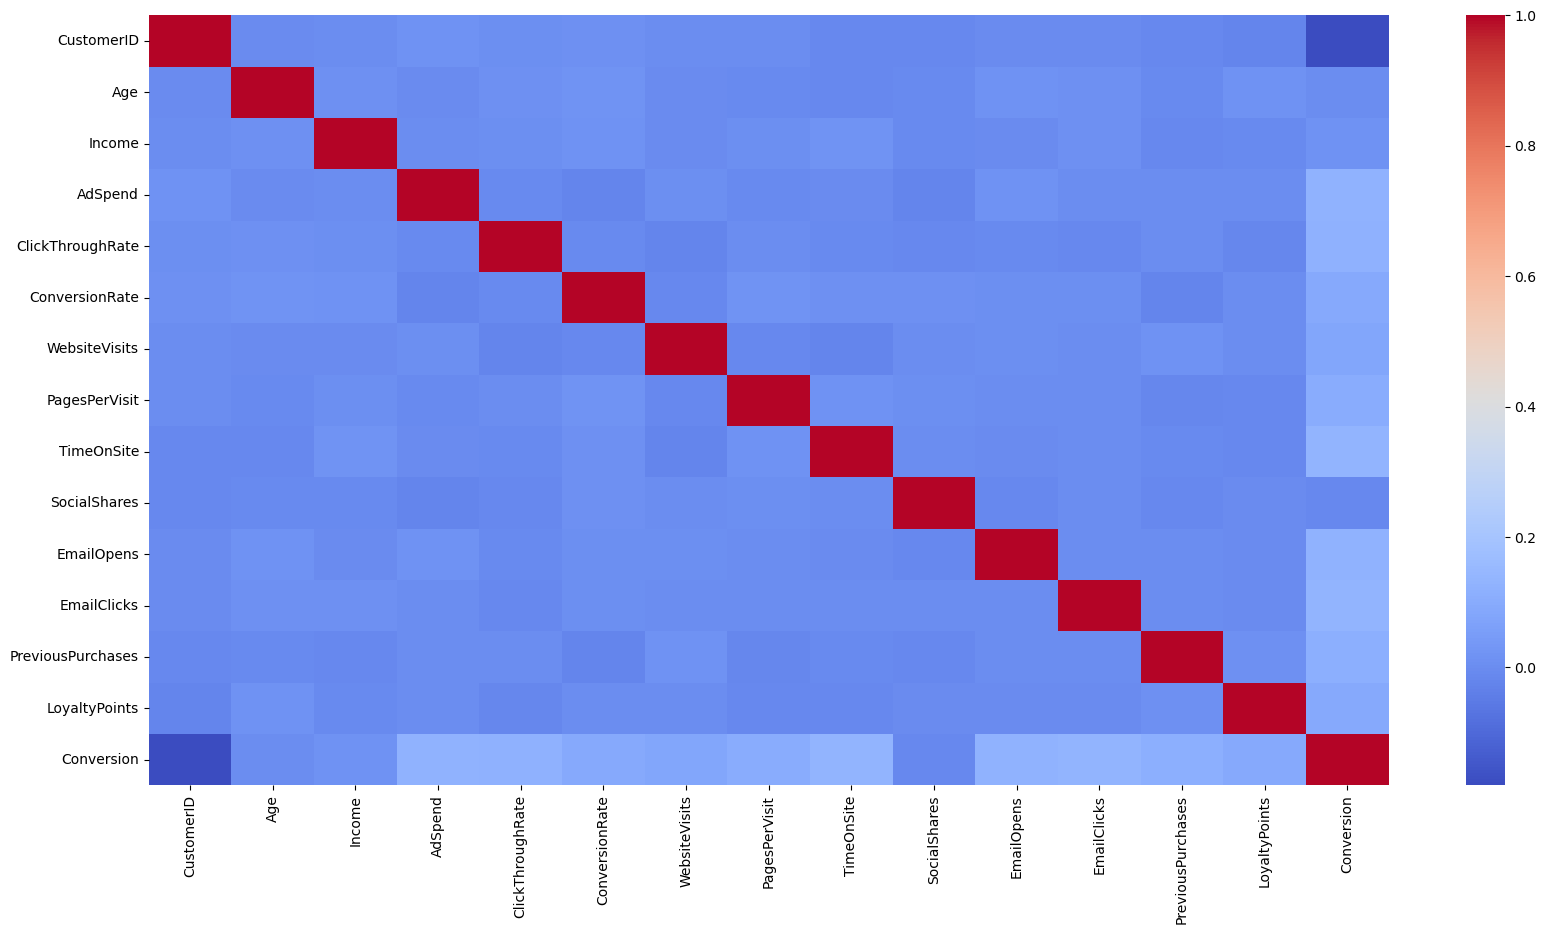

In [5]:
matrix = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(matrix, cmap="coolwarm")
plt.show()


Обираємо найкращі колонки для аналізу (в ідеалі значення кореляції має бути 95%)

In [6]:
X = data[["AdSpend", "ClickThroughRate", "TimeOnSite", "EmailOpens", "EmailClicks"]]
y = data[["Conversion"]]

Робимо навчання моделі

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Імпортуємо лінійну регресію

In [8]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Робимо предиктор

In [9]:
y_pred = regressor.predict(x_test)



Знаходимо MAE, MSE, RMSE

In [10]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2060351901429881
Mean Squared Error: 0.101165774878808
Root Mean Squared Error: 0.3180656769895299


Знаходимо RSE та R^2

In [15]:
model = sm.OLS(y, X, data = data).fit()
print("RSE: ", model.resid.std(ddof=X.shape[1]))
print("R^2: ", model.rsquared)


RSE:  0.3392182283602148
R^2:  0.8676441572145033


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


Виводимо всі значення для наших стовпців

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Conversion   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          1.048e+04
Date:                Wed, 04 Dec 2024   Prob (F-statistic):                        0.00
Time:                        22:07:46   Log-Likelihood:                         -2735.2
No. Observations:                8000   AIC:                                      5480.
Df Residuals:                    7995   BIC:                                      5515.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
AdSpend           3.409e-05   1.21e-06     28.226      0.000    3.17e-05    3.65e-05
ClickThroughRate     1.2066      0.040     30.180      0.000       1.128       1.285
TimeOnSite           0.0242      0.001     30.272      0.000       0.023       0.026
EmailOpens           0.0163      0.001     26.843      0.000       0.015       0.018
EmailClicks          0.0326      0.001     26.545      0.000       0.030       0.035
==============================================================================
Omnibus:                     1452.408   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2525.002
Skew:                          -1.176   Prob(JB):                         0.00
Kurtosis:                       4.428   Cond. No.                     6.04e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Малюємо лінію регресії

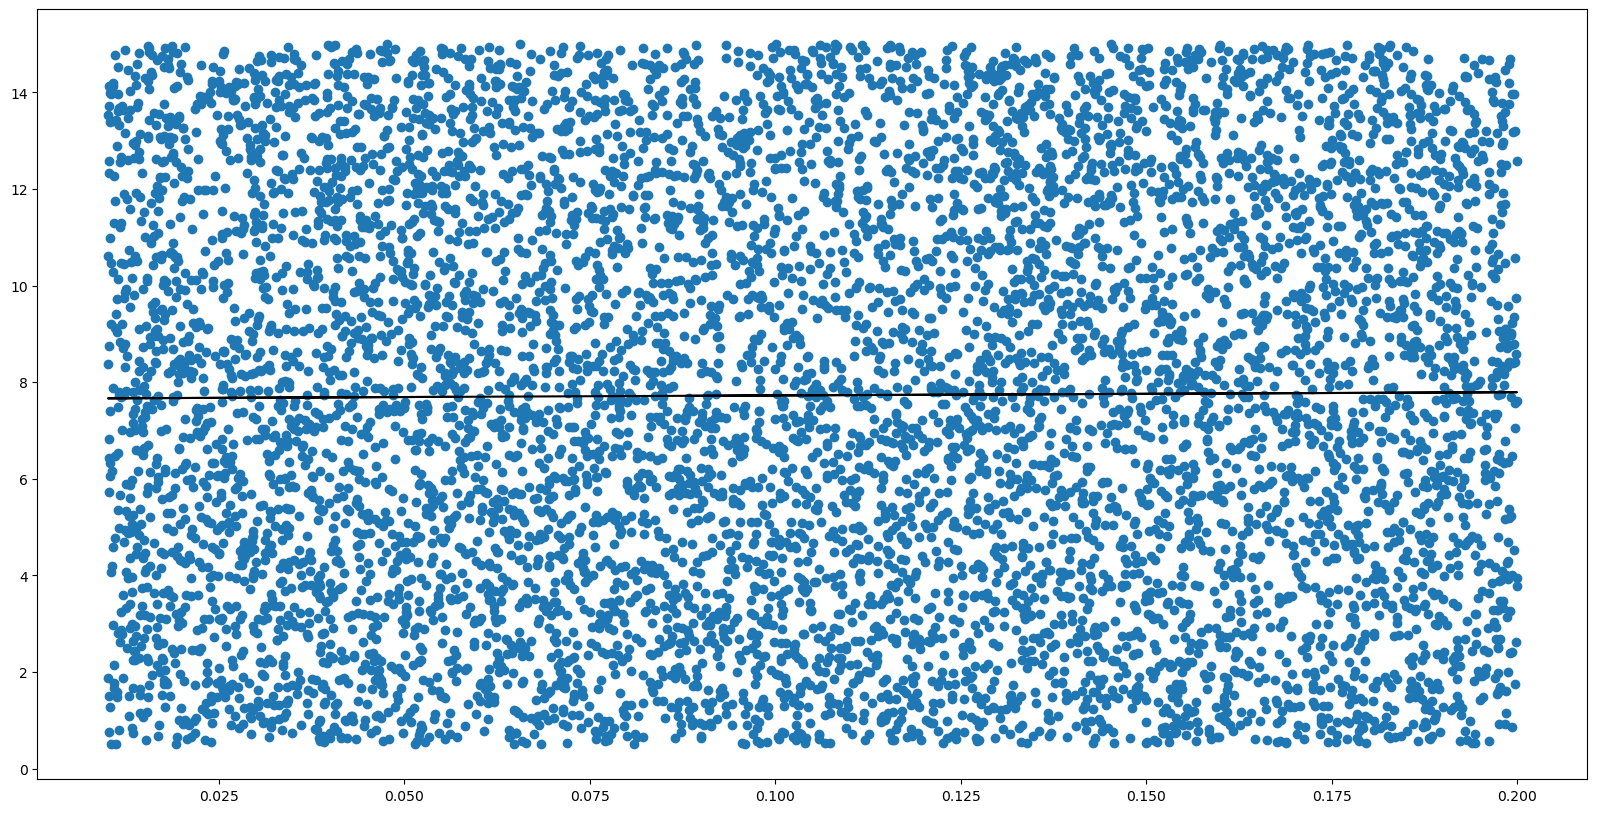

In [34]:
x = data[["ConversionRate"]]
y = data[["TimeOnSite"]]
regressor = LinearRegression()
regressor.fit(x,y)
y_pred = regressor.predict(x)
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x,y)
plt.plot(x, y_pred, color = 'black')
plt.show()

Будуємо передбачення на три кроки вперед

In [41]:
d = {"pred" : [3, 6, 9] }
df_pred = pd.DataFrame(d)
df_pred['predicted'] = regressor.predict(df_pred['pred'].values.reshape(-1,1))
df_pred

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,pred,predicted
0,3,9.664020
1,6,11.670126
2,9,13.676233
